# Fatal Police Shootings in the US
## by Fares Lassoued

## Preliminary Wrangling

> This [dataset](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us) is from kaggle and it states as description:

>The 2014 killing of Michael Brown in Ferguson, Missouri, began the protest movement culminating in Black Lives Matter and an increased focus on police accountability nationwide.
Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.
It's difficult to find reliable data from before this period, as police killings haven't been comprehensively documented, and the statistics on police brutality are much less available. As a result, a vast number of cases go unreported.
The Washington Post is tracking more than a dozen details about each killing - including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.
There are four additional datasets. These are US census data on poverty rate, high school graduation rate, median household income, and racial demographics.
Source of census data:
https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
%matplotlib inline

uni_color = sb.color_palette()[0]

In [16]:
#defining some plotting functions

def pie_plot(df, cat_var):
    """
    plots a cat_var from given df pie plot with ordered values, 90° start angle and counterclock direction
    """
    sorted_counts = df[cat_var].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
            counterclock = False);
    plt.axis('square')
    plt.show()

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

The dataset comes into 5 different files : `PoliceKillings.csv` and we will use other csv files to depict relationships and answer specific questions.

In [59]:
median_house_income = pd.read_csv('data/clean/median_house_income_clean.csv')
percentage_below_poverty_level = pd.read_csv('data/clean/percentage_below_poverty_level_clean.csv')
percent_over25_comp_highschool = pd.read_csv('data/clean/percent_over25_comp_highschool_clean.csv')
share_by_race = pd.read_csv('data/clean/share_by_race_clean.csv')
police_killings = pd.read_csv('data/clean/police_killings_clean.csv', parse_dates=['date'])

In [60]:
print(police_killings.shape)
print(police_killings.dtypes)
police_killings.head()

(2254, 14)
id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                                 int64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


In [61]:
print(median_house_income.shape)
print(median_house_income.dtypes)
median_house_income.head()

(27418, 3)
geographic_area    object
city               object
median_income       int64
dtype: object


,geographic_area,city,median_income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [62]:
print(percentage_below_poverty_level.shape)
print(percentage_below_poverty_level.dtypes)
percentage_below_poverty_level.head()

(29329, 3)
geographic_area     object
city                object
poverty_rate       float64
dtype: object


,geographic_area,city,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [6]:
print(percent_over25_comp_highschool.shape)
print(percent_over25_comp_highschool.dtypes)
percent_over25_comp_highschool.head()

(29329, 3)
Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object


,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [63]:
print(share_by_race.shape)
print(share_by_race.dtypes)
share_by_race.head()

(29268, 7)
geographic_area           object
city                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object


,geographic_area,city,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,13.2,86.5,0.0,0.0,0.3


### What is the structure of your dataset?

> The dataset covers 2254 (after dropping entries with missing values) police killings since Jan. 1, 2015 with different features like (id, name, manner_of_death, ...) where most of the features (9/14) are qualitative, 2 boolean,1 date, 1 numeric and 1 id.

>There is additional information about ~29k cities like median house income per city, share by race per city, percentage of high school graduation for people over 25 and percentage below poverty level per city.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in depicting the most important factors that lead to shootings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I call that cities with high poverty level and low graduation rate are important features. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

we will start by looking at the age.

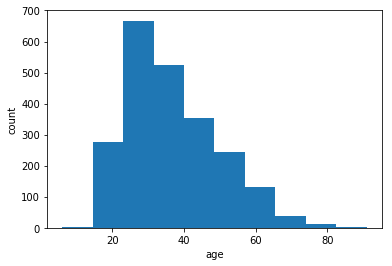

In [64]:
plt.hist(police_killings.age)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Age distribution is right skewed with a peak between 20 and 40.

let's try a different bin size

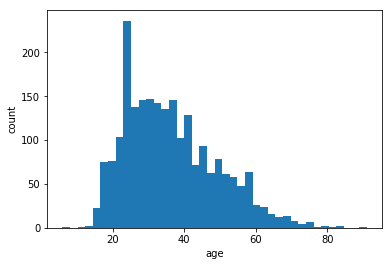

In [65]:
plt.hist(police_killings.age, bins=40)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

interesting! there's certain age (~25) with the highest count, otherwise the plot is the same.

now, we'll look for different qualitative variables

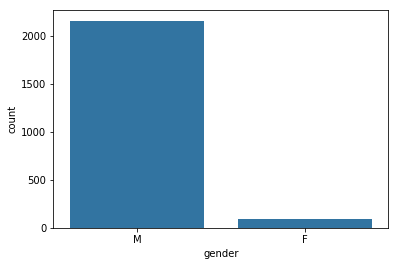

In [66]:
#gender
sb.countplot(data=police_killings, x='gender', color=uni_color);

Males have the highest count in this data with around 90/10 % ratio, let's see the values for different races.

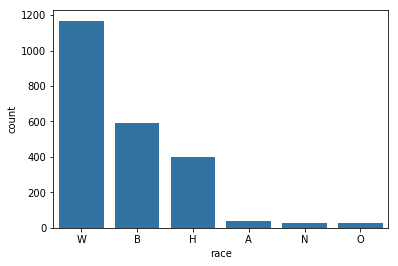

In [67]:
sb.countplot(data=police_killings, x='race', color=uni_color, order=police_killings.race.value_counts().index);

ordered from highest to lowest counts, people with white race are the most killed in this data, followed by black as the 2nd most killed, then comes hispanic race in third place and finally Asian, Native american and other with small counts.

let's check manner of death variable.

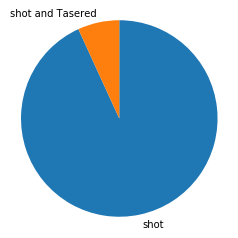

In [68]:
pie_plot(police_killings, 'manner_of_death')

Most of the manner_of_death counts are direct shots and a small percentage (around 10%) of shot and tasered.

let's explore the signs_of_mentall_illness variable

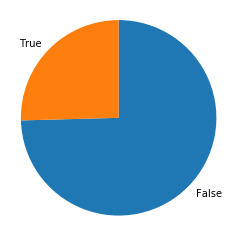

In [69]:
pie_plot(police_killings, 'signs_of_mental_illness')

Only around 25% of killings have shown signs of mental illness, let's check more variables like if the suspect were a fleeing or not and the threat level

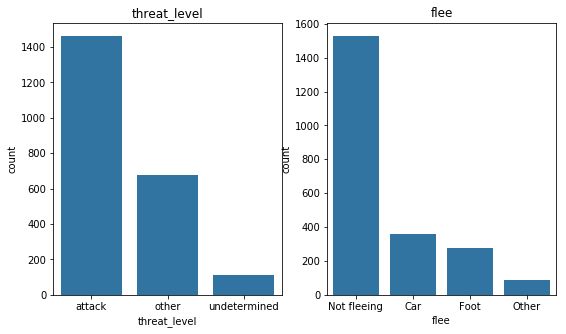

In [70]:
plt.figure(figsize=(9,5))

plt.subplot(121)
ax1 = sb.countplot(data=police_killings, x='threat_level', color=uni_color)
ax1.title.set_text('threat_level')

plt.subplot(122)
ax1 = sb.countplot(data=police_killings, x='flee', color=uni_color)
ax1.title.set_text('flee')

We can clearly see that most suspects were showing *attack* threat level and were'nt fleeing.

Next, we'll check the states where the killings took place and dig deeper beyond that by exploring data related to the state with most killings.

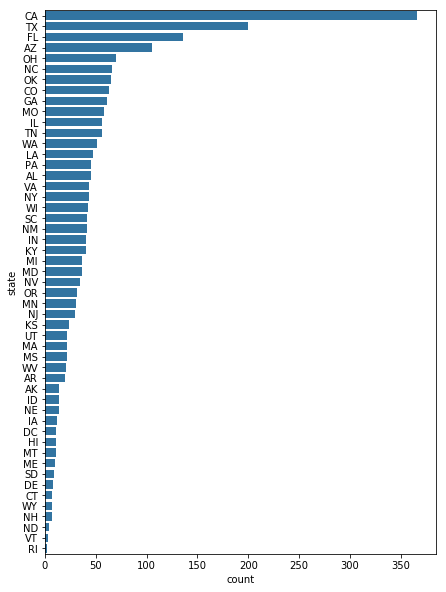

In [71]:
plt.figure(figsize=(7,10))
sb.countplot(data=police_killings, y='state', color=uni_color, order=police_killings.state.value_counts().index);

California is the state where most killings took place while Rhode Island is the one with least killings.

Let's compare these two states' share by race, poverty level and high school grad level

In [74]:
share_by_race[share_by_race.geographic_area == 'RI'].groupby('geographic_area').mean()

,share_white,share_black,share_native_american,share_asian,share_hispanic
geographic_area,,,,,
RI,89.226471,2.988235,0.670588,1.688235,6.667647


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!